In [79]:
import numpy as np
import pandas as pd
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

import warnings
import missingno
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set(style="darkgrid",font_scale=1.5)
pd.set_option("display.max.columns",None)
pd.set_option("display.max.rows",None)

In [80]:

from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import StackingClassifier

from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVR
import xgboost as xgb   
import lightgbm as lgb

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import StratifiedKFold

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_curve



from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder

import pickle

In [81]:
df = pd.read_csv('heart.csv')

In [82]:
df.head()

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0

In [83]:
df.tail()

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
913    132              N      1.2     Flat             1  
914    141              N      3.4     Flat             1  
915    115              Y      1.2     Flat             1  
916    174              N      0.0     Flat             1  
917    173              N      0.0       Up             0

In [84]:
df.sample(5)

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
695   58   M           ASY        146          218          0     Normal   
331   56   M           ASY        115            0          1         ST   
241   54   M           ASY        200          198          0     Normal   
114   49   F           NAP        130          207          0         ST   
674   62   M           ATA        120          281          0        LVH   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
695    105              N      2.0     Flat             1  
331     82              N     -1.0       Up             1  
241    142              Y      2.0     Flat             1  
114    135              N      0.0       Up             0  
674    103              N      1.4     Flat             1

In [85]:
#check for duplicates
df.duplicated().sum()

np.int64(0)

In [86]:
#check for missing values
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [88]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [89]:
df.describe().T

count        mean         std   min     25%    50%    75%    max
Age           918.0   53.510893    9.432617  28.0   47.00   54.0   60.0   77.0
RestingBP     918.0  132.396514   18.514154   0.0  120.00  130.0  140.0  200.0
Cholesterol   918.0  198.799564  109.384145   0.0  173.25  223.0  267.0  603.0
FastingBS     918.0    0.233115    0.423046   0.0    0.00    0.0    0.0    1.0
MaxHR         918.0  136.809368   25.460334  60.0  120.00  138.0  156.0  202.0
Oldpeak       918.0    0.887364    1.066570  -2.6    0.00    0.6    1.5    6.2
HeartDisease  918.0    0.553377    0.497414   0.0    0.00    1.0    1.0    1.0

In [90]:
df.describe(include='object').T

count unique     top freq
Sex              918      2       M  725
ChestPainType    918      4     ASY  496
RestingECG       918      3  Normal  552
ExerciseAngina   918      2       N  547
ST_Slope         918      3    Flat  460

In [91]:
numeric_data = df.select_dtypes(include=[np.number])
numeric_data.head()

Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  HeartDisease
0   40        140          289          0    172      0.0             0
1   49        160          180          0    156      1.0             1
2   37        130          283          0     98      0.0             0
3   48        138          214          0    108      1.5             1
4   54        150          195          0    122      0.0             0

In [92]:
categorical_data = df.select_dtypes(exclude=[np.number])
categorical_data.head()

Sex ChestPainType RestingECG ExerciseAngina ST_Slope
0   M           ATA     Normal              N       Up
1   F           NAP     Normal              N     Flat
2   M           ATA         ST              N       Up
3   F           ASY     Normal              Y     Flat
4   M           NAP     Normal              N       Up

<function matplotlib.pyplot.show(close=None, block=None)>

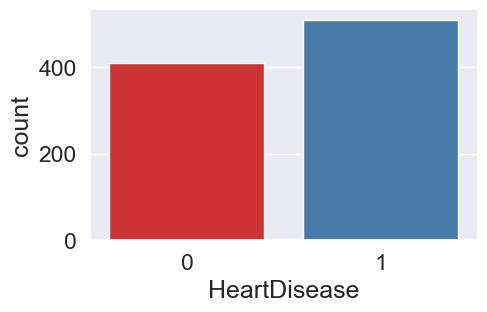

In [93]:
plt.figure(figsize=(5,3))
sns.countplot(x='HeartDisease', data=df, palette='Set1')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

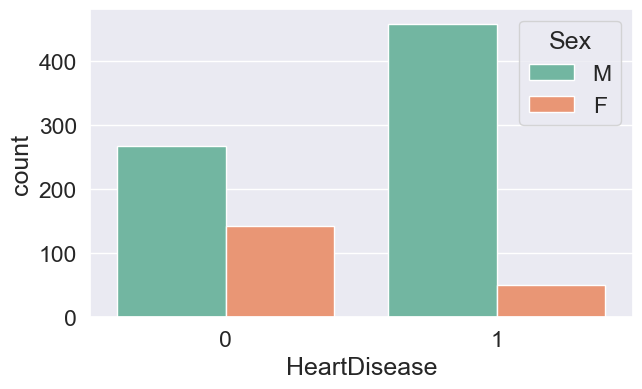

In [94]:
plt.figure(figsize=(7,4))
sns.countplot(x='HeartDisease',hue='Sex', data=df, palette='Set2')
plt.show

### Info: More male have Heart Disease

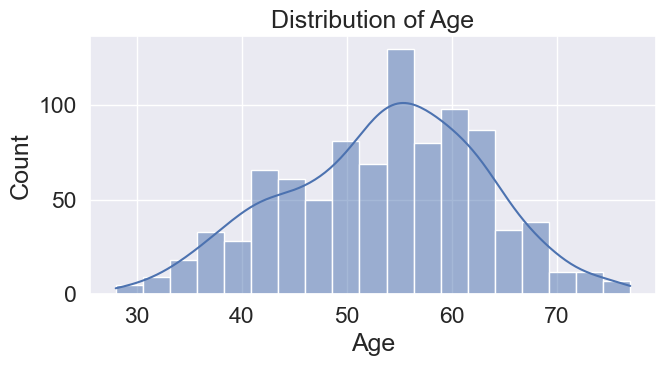

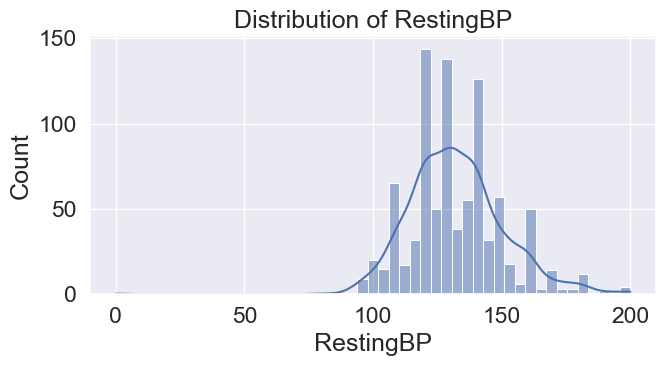

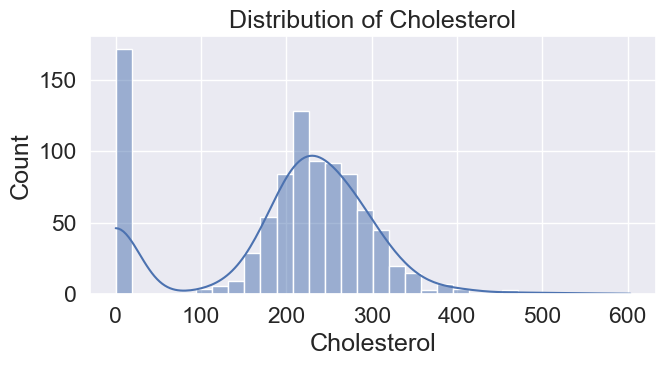

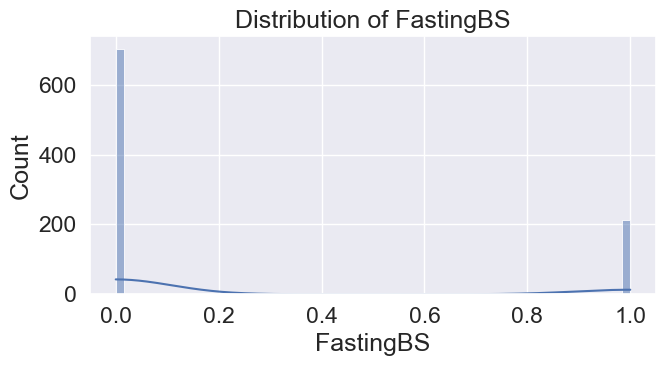

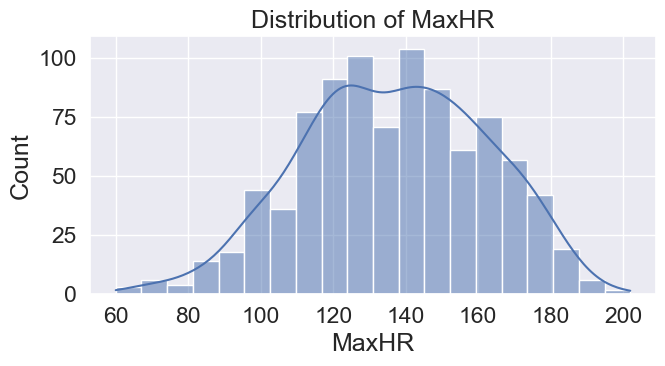

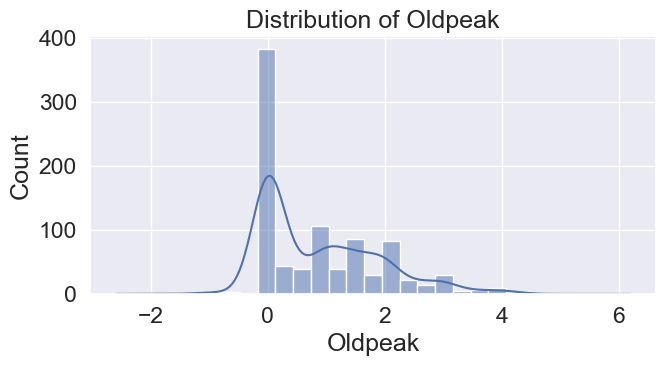

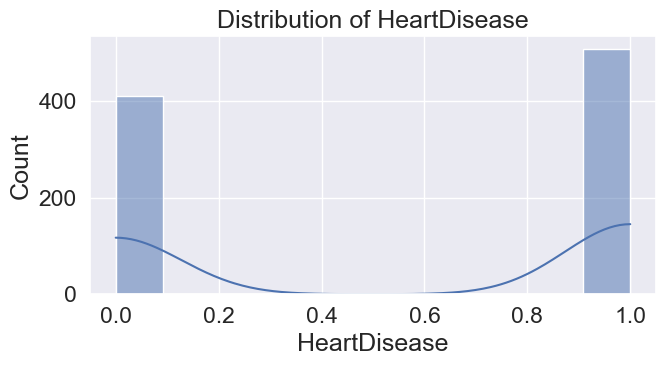

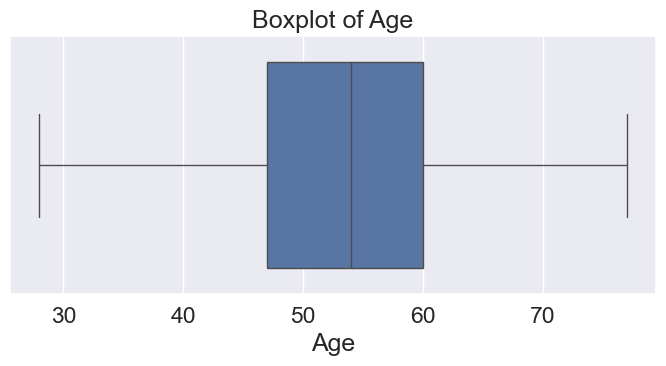

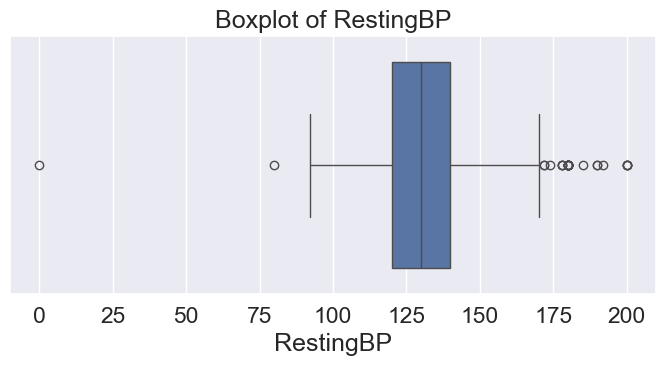

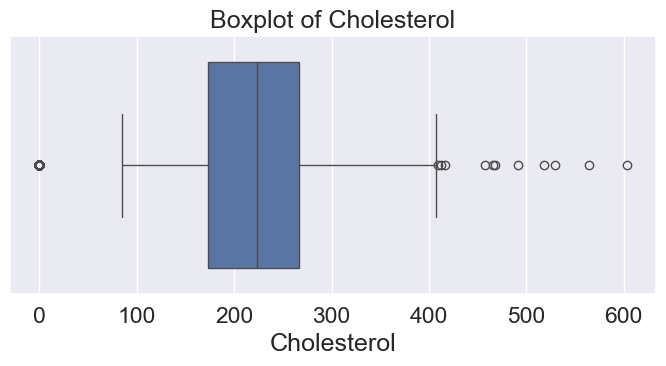

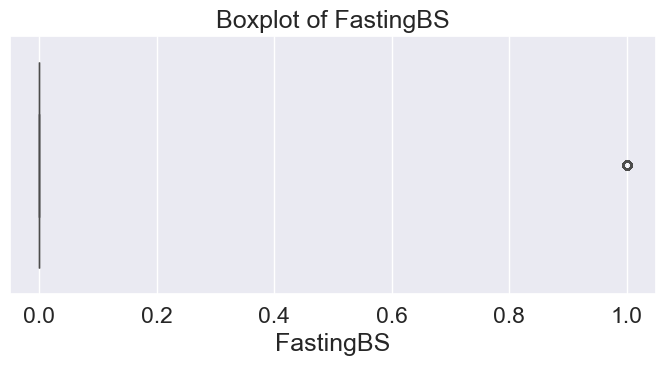

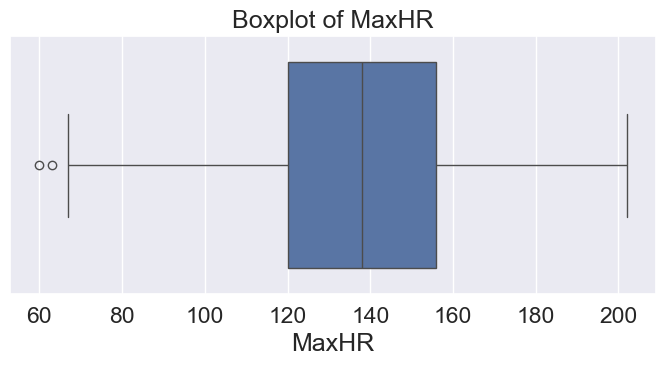

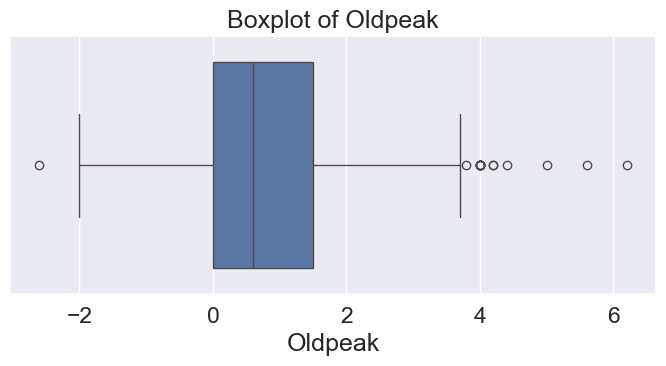

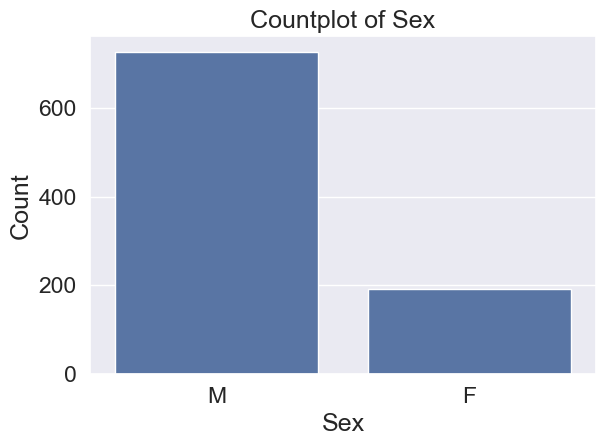

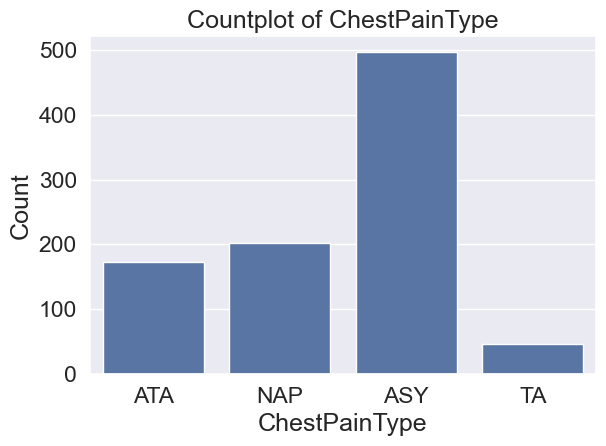

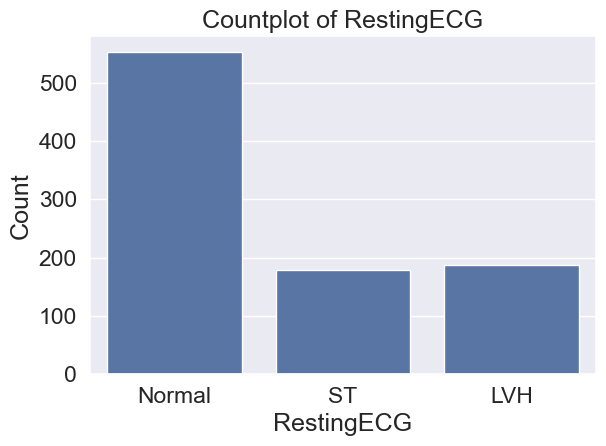

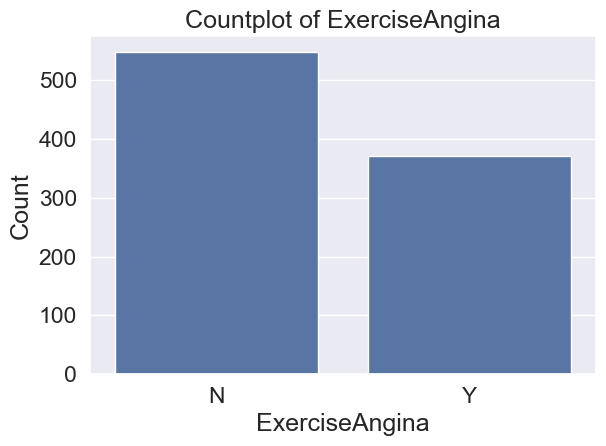

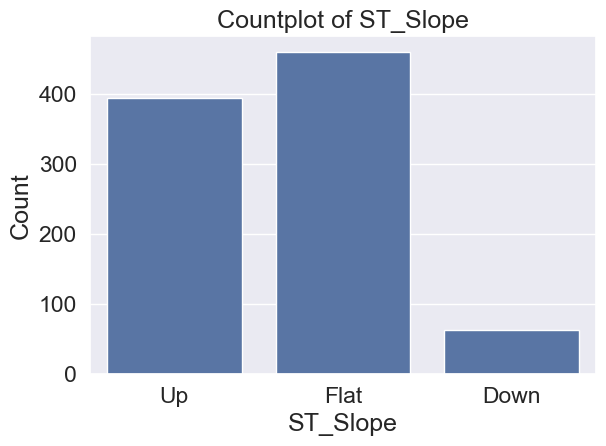

In [95]:
# ==========================
# 3. Univariate: numeric histograms
# ==========================
for col in numeric_data:
    plt.figure(figsize=(7,4))
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

# ==========================
# 4. Univariate: numeric boxplots (outliers)
# ==========================
for col in numeric_data:
    plt.figure(figsize=(7,4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()

# ==========================
# 5. Univariate: categorical countplots
# ==========================
for col in categorical_data:
    plt.figure()
    sns.countplot(data=df, x=col)
    plt.title(f"Countplot of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()


<Axes: >

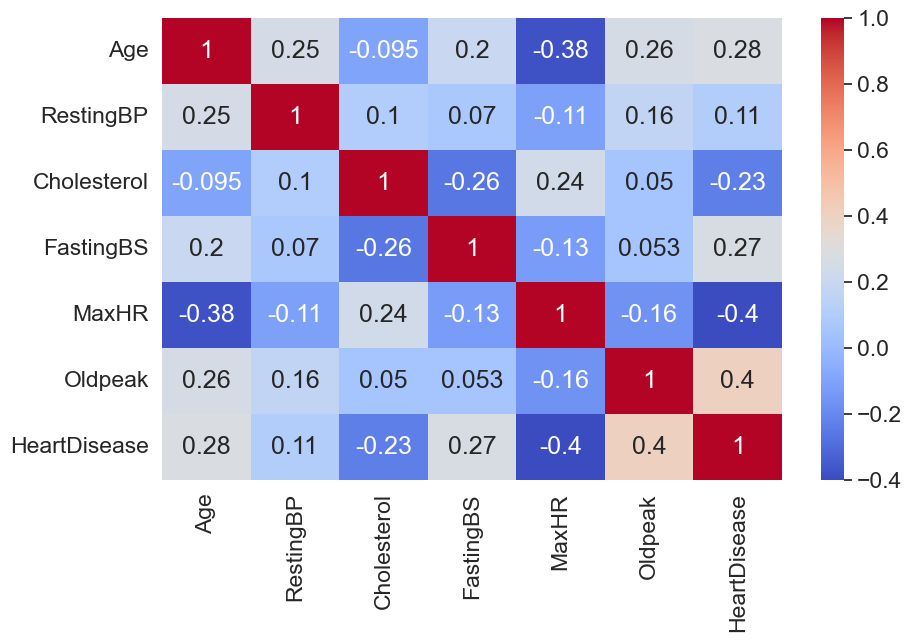

In [96]:
plt.figure(figsize=(10,6))
sns.heatmap(numeric_data.corr(),annot=True,cmap='coolwarm')

In [97]:
categorical_data.head()

Sex ChestPainType RestingECG ExerciseAngina ST_Slope
0   M           ATA     Normal              N       Up
1   F           NAP     Normal              N     Flat
2   M           ATA         ST              N       Up
3   F           ASY     Normal              Y     Flat
4   M           NAP     Normal              N       Up

In [98]:
df.head()

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0

In [99]:
categorical_data.head()

Sex ChestPainType RestingECG ExerciseAngina ST_Slope
0   M           ATA     Normal              N       Up
1   F           NAP     Normal              N     Flat
2   M           ATA         ST              N       Up
3   F           ASY     Normal              Y     Flat
4   M           NAP     Normal              N       Up

In [100]:
encoders = {}

for col in categorical_data:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le

In [101]:
scalers = {}

scalers["Oldpeak"] = MinMaxScaler().fit(df[["Oldpeak"]])
df["Oldpeak"] = scalers["Oldpeak"].transform(df[["Oldpeak"]])

for col in ["Age", "RestingBP", "Cholesterol", "MaxHR"]:
    scaler = StandardScaler().fit(df[[col]])
    df[col] = scaler.transform(df[[col]])
    scalers[col] = scaler

In [102]:
feature_cols = df.columns.drop(['HeartDisease', 'RestingBP', 'RestingECG'])

x = df[feature_cols].values
y = df['HeartDisease'].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 2)

In [103]:
def model(classifier):
    
    classifier.fit(x_train,y_train)
    prediction = classifier.predict(x_test)
    cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 1)
    print("Accuracy : ",'{0:.2%}'.format(accuracy_score(y_test,prediction)))
    print("Cross Validation Score : ",'{0:.2%}'.format(cross_val_score(classifier,x_train,y_train,cv = cv,scoring = 'roc_auc').mean()))
    print("ROC_AUC Score : ",'{0:.2%}'.format(roc_auc_score(y_test,prediction)))
   
    plt.show()

def model_evaluation(classifier):
    
    # Confusion Matrix
    cm = confusion_matrix(y_test,classifier.predict(x_test))
    print(cm)
    names = ['True Neg','False Pos','False Neg','True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm,annot = labels,cmap = 'Blues',fmt ='')
    #sns.heatmap(cm,annot = labels,cmap = colors,fmt ='')
    
    # Classification Report
    print(classification_report(y_test,classifier.predict(x_test)))

In [104]:
classifier_lr = LogisticRegression(random_state=0,C=1,penalty='l2')
model(classifier_lr)

Accuracy :  86.96%
Cross Validation Score :  91.13%
ROC_AUC Score :  86.91%


[[76 13]
 [11 84]]
              precision    recall  f1-score   support

           0       0.87      0.85      0.86        89
           1       0.87      0.88      0.88        95

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184



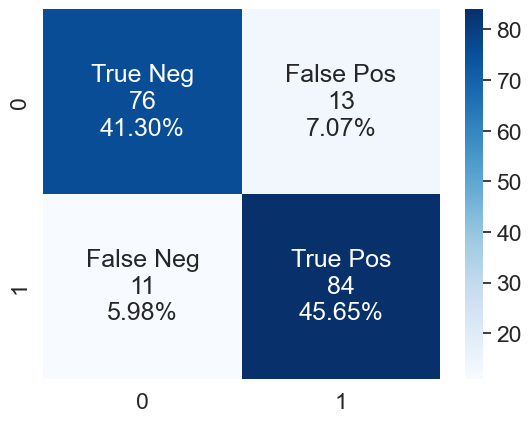

In [105]:
model_evaluation(classifier_lr)

In [106]:
dt= DecisionTreeClassifier(random_state=0,max_depth=5)
model(dt)


Accuracy :  84.24%
Cross Validation Score :  87.65%
ROC_AUC Score :  84.17%


[[73 16]
 [13 82]]
              precision    recall  f1-score   support

           0       0.85      0.82      0.83        89
           1       0.84      0.86      0.85        95

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184



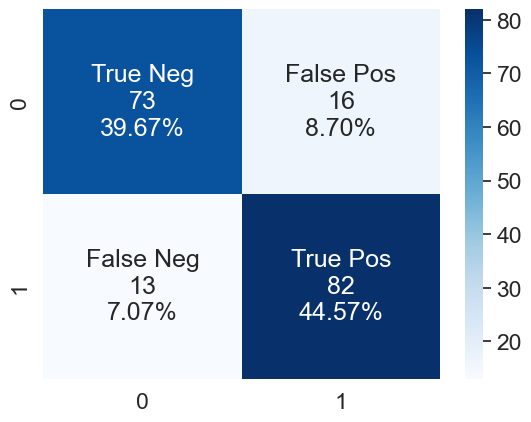

In [107]:
model_evaluation(dt)

In [108]:

rf=RandomForestClassifier(random_state=0,n_estimators=100,max_depth=None,max_features='sqrt',min_samples_leaf=4,min_samples_split=2,bootstrap=True,class_weight=None)
model(rf)

Accuracy :  84.24%
Cross Validation Score :  92.96%
ROC_AUC Score :  84.10%


[[71 18]
 [11 84]]
              precision    recall  f1-score   support

           0       0.87      0.80      0.83        89
           1       0.82      0.88      0.85        95

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184



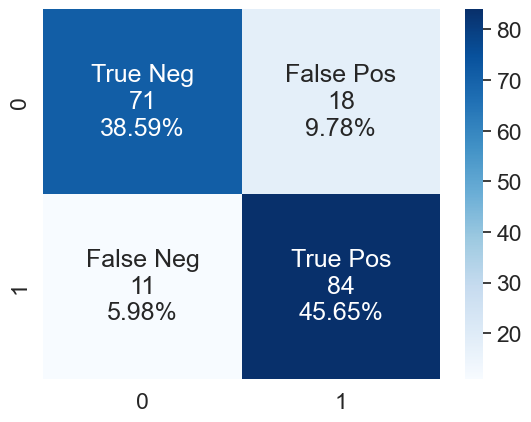

In [109]:
model_evaluation(rf)

In [110]:
gbc=GradientBoostingClassifier(random_state=0,n_estimators=100,learning_rate=0.1,max_depth=3)
model(gbc)

Accuracy :  83.70%
Cross Validation Score :  92.13%
ROC_AUC Score :  83.61%


In [111]:
model_evaluation(gbc)

[[72 17]
 [13 82]]
              precision    recall  f1-score   support

           0       0.85      0.81      0.83        89
           1       0.83      0.86      0.85        95

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184



In [112]:
xgbc = XGBClassifier(random_state=0,n_estimators=200,learning_rate=0.1,max_depth=3,use_label_encoder=False,eval_metric='logloss')
model(xgbc)

Accuracy :  85.87%
Cross Validation Score :  92.43%
ROC_AUC Score :  85.75%


[[73 16]
 [10 85]]
              precision    recall  f1-score   support

           0       0.88      0.82      0.85        89
           1       0.84      0.89      0.87        95

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



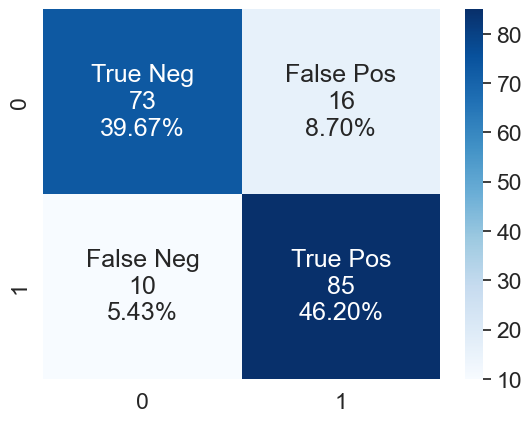

In [113]:
model_evaluation(xgbc)

In [114]:
lg=LGBMClassifier(objective="binary",      # or "multiclass"
    n_estimators=500,        # we'll allow early stopping or tune this
    n_jobs=-1,
    random_state=42)
model(lg)

[LightGBM] [Info] Number of positive: 413, number of negative: 321
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000292 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 315
[LightGBM] [Info] Number of data points in the train set: 734, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.562670 -> initscore=0.252006
[LightGBM] [Info] Start training from score 0.252006
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

In [115]:
model_evaluation(lg)

[[71 18]
 [13 82]]
              precision    recall  f1-score   support

           0       0.85      0.80      0.82        89
           1       0.82      0.86      0.84        95

    accuracy                           0.83       184
   macro avg       0.83      0.83      0.83       184
weighted avg       0.83      0.83      0.83       184



In [116]:
cat=CatBoostClassifier(random_state=0,n_estimators=100,learning_rate=0.1,max_depth=3,verbose=0)
model(cat)

Accuracy :  86.96%
Cross Validation Score :  92.94%
ROC_AUC Score :  86.80%


In [117]:
model_evaluation(cat)

[[73 16]
 [ 8 87]]
              precision    recall  f1-score   support

           0       0.90      0.82      0.86        89
           1       0.84      0.92      0.88        95

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184



In [118]:
knn=KNeighborsClassifier()
model(knn)

Accuracy :  80.98%
Cross Validation Score :  90.43%
ROC_AUC Score :  80.80%


[[67 22]
 [13 82]]
              precision    recall  f1-score   support

           0       0.84      0.75      0.79        89
           1       0.79      0.86      0.82        95

    accuracy                           0.81       184
   macro avg       0.81      0.81      0.81       184
weighted avg       0.81      0.81      0.81       184



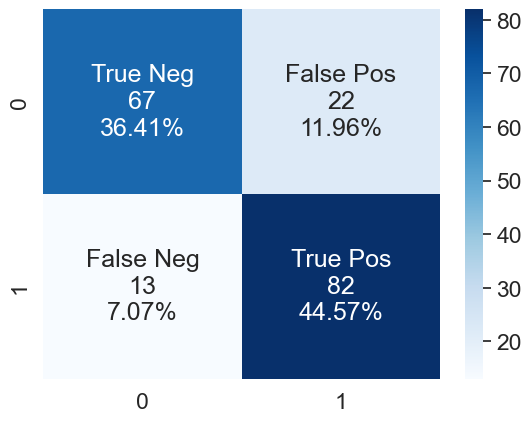

In [119]:
model_evaluation(knn)

In [120]:
param_grid = {
    "penalty": ["l1", "l2", "elasticnet"],
    "C": [0.001, 0.01, 0.1, 1, 10, 100],
    "solver": ["liblinear", "saga"],
    "l1_ratio": [0, 0.5, 1],   # only used when penalty='elasticnet'
    "class_weight": [None, "balanced"],
    "max_iter": [500]
}

log_reg = LogisticRegression(random_state=42)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid = GridSearchCV(
    estimator=log_reg,
    param_grid=param_grid,
    scoring="accuracy",        # or accuracy, f1, balanced_accuracy
    cv=cv,
    n_jobs=-1,
    verbose=1
)

grid.fit(x_train, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LogisticRegression(random_state=42), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'class_weight': [None, 'balanced'],
                         'l1_ratio': [0, 0.5, 1], 'max_iter': [500],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy', verbose=1)

In [121]:
classifier_lr=LogisticRegression(**grid.best_params_)
model(classifier_lr)

Accuracy :  87.50%
Cross Validation Score :  91.13%
ROC_AUC Score :  87.43%


In [122]:
model_evaluation(classifier_lr)

[[76 13]
 [10 85]]
              precision    recall  f1-score   support

           0       0.88      0.85      0.87        89
           1       0.87      0.89      0.88        95

    accuracy                           0.88       184
   macro avg       0.88      0.87      0.87       184
weighted avg       0.88      0.88      0.87       184



In [123]:
base_model = CatBoostClassifier(
    loss_function='Logloss',
    eval_metric='AUC',
    random_seed=42,
    od_type='Iter',
    od_wait=50,
    verbose=False
)

param_dist = {
    'depth': [3, 4, 5, 6, 8],
    'learning_rate': [0.01, 0.03, 0.05, 0.1, 0.2],
    'l2_leaf_reg': [1, 3, 5, 7, 10, 15],
    'bagging_temperature': [0, 0.5, 1.0, 2.0],
    'border_count': [64, 128, 254],
    'iterations': [300, 600, 1000, 1500]
}

search = RandomizedSearchCV(
    estimator=base_model,
    param_distributions=param_dist,
    n_iter=30,              # increase if you have more time
    scoring='recall',
    cv=5,
    n_jobs=-1,
    verbose=2,
    refit=True              # refit on full trainval with best params
)

search.fit(x_train, y_train)

print("Best params:", search.best_params_)
print("Best CV AUC:", search.best_score_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best params: {'learning_rate': 0.01, 'l2_leaf_reg': 5, 'iterations': 300, 'depth': 4, 'border_count': 254, 'bagging_temperature': 1.0}
Best CV AUC: 0.9151924772259772


In [124]:
cat=CatBoostClassifier(learning_rate= 0.01, l2_leaf_reg= 5, iterations= 300, depth= 5, border_count= 64, bagging_temperature= 1.0)
model(cat)

0:	learn: 0.6851461	total: 2.22ms	remaining: 663ms
1:	learn: 0.6771244	total: 5.96ms	remaining: 888ms
2:	learn: 0.6688374	total: 8.08ms	remaining: 800ms
3:	learn: 0.6634148	total: 11.1ms	remaining: 822ms
4:	learn: 0.6566858	total: 15.2ms	remaining: 899ms
5:	learn: 0.6486941	total: 19.9ms	remaining: 974ms
6:	learn: 0.6401624	total: 22ms	remaining: 921ms
7:	learn: 0.6324327	total: 24ms	remaining: 875ms
8:	learn: 0.6252934	total: 26ms	remaining: 839ms
9:	learn: 0.6192335	total: 27.5ms	remaining: 797ms
10:	learn: 0.6122448	total: 29.3ms	remaining: 769ms
11:	learn: 0.6074826	total: 30.6ms	remaining: 735ms
12:	learn: 0.6037705	total: 32ms	remaining: 707ms
13:	learn: 0.5980896	total: 34.2ms	remaining: 699ms
14:	learn: 0.5925347	total: 36.1ms	remaining: 685ms
15:	learn: 0.5873675	total: 38.1ms	remaining: 675ms
16:	learn: 0.5811888	total: 40ms	remaining: 666ms
17:	learn: 0.5770274	total: 41.5ms	remaining: 650ms
18:	learn: 0.5708514	total: 43.5ms	remaining: 643ms
19:	learn: 0.5657622	total: 45.5

[[73 16]
 [ 9 86]]
              precision    recall  f1-score   support

           0       0.89      0.82      0.85        89
           1       0.84      0.91      0.87        95

    accuracy                           0.86       184
   macro avg       0.87      0.86      0.86       184
weighted avg       0.87      0.86      0.86       184



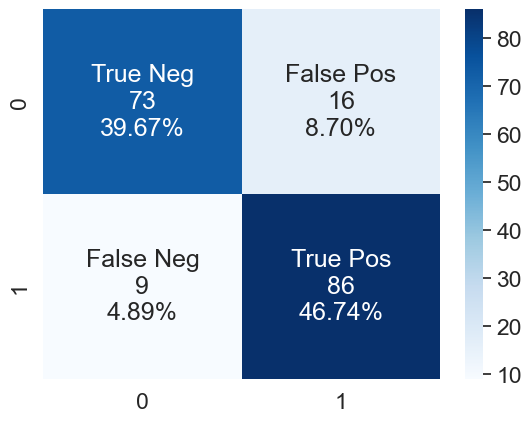

In [125]:
model_evaluation(cat)

In [126]:
cat=CatBoostClassifier(scale_pos_weight=3,learning_rate= 0.01, l2_leaf_reg=15, iterations=600, depth=4, border_count=254, bagging_temperature=1.0)
model(cat)

0:	learn: 0.6820136	total: 1.45ms	remaining: 866ms
1:	learn: 0.6726493	total: 2.65ms	remaining: 793ms
2:	learn: 0.6642438	total: 3.86ms	remaining: 768ms
3:	learn: 0.6541212	total: 5ms	remaining: 744ms
4:	learn: 0.6441537	total: 6.03ms	remaining: 718ms
5:	learn: 0.6351924	total: 7.05ms	remaining: 698ms
6:	learn: 0.6278593	total: 8.34ms	remaining: 706ms
7:	learn: 0.6217938	total: 9.39ms	remaining: 695ms
8:	learn: 0.6129010	total: 10.4ms	remaining: 685ms
9:	learn: 0.6038601	total: 11.5ms	remaining: 676ms
10:	learn: 0.5967895	total: 12.6ms	remaining: 676ms
11:	learn: 0.5886234	total: 13.7ms	remaining: 674ms
12:	learn: 0.5807962	total: 15ms	remaining: 677ms
13:	learn: 0.5738157	total: 16.2ms	remaining: 676ms
14:	learn: 0.5659069	total: 17.2ms	remaining: 672ms
15:	learn: 0.5600330	total: 18.3ms	remaining: 667ms
16:	learn: 0.5524894	total: 19.7ms	remaining: 677ms
17:	learn: 0.5454138	total: 21ms	remaining: 679ms
18:	learn: 0.5384055	total: 22ms	remaining: 671ms
19:	learn: 0.5316045	total: 22.

In [127]:
model_evaluation(cat)

[[58 31]
 [ 6 89]]
              precision    recall  f1-score   support

           0       0.91      0.65      0.76        89
           1       0.74      0.94      0.83        95

    accuracy                           0.80       184
   macro avg       0.82      0.79      0.79       184
weighted avg       0.82      0.80      0.79       184



In [128]:
cat=CatBoostClassifier(random_state=0,n_estimators=100,learning_rate=0.1,max_depth=3,verbose=0)
model(cat)

Accuracy :  86.96%
Cross Validation Score :  92.94%
ROC_AUC Score :  86.80%


In [129]:
import joblib

joblib.dump(cat, "cat_model.pkl")

# Save encoders and scalers
joblib.dump(encoders, "encoders.pkl")
joblib.dump(scalers, "scalers.pkl")




['scalers.pkl']